# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from six import StringIO
from IPython.display import Image  
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [3]:
df=df.drop(['Id'],axis=1)

In [4]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df_new=df.set_index('Species')
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)

In [9]:
df_new.head()

0
Species                       
Iris-setosa SepalLengthCm  5.1
            SepalWidthCm   3.5
            PetalLengthCm  1.4
            PetalWidthCm   0.2
            SepalLengthCm  4.9

In [10]:
df_new.reset_index(inplace=True)
df_new.rename(columns={'level_1':'measurement',0:'size'},inplace=True)

In [11]:
df_new.head()

,Species,measurement,size
0,Iris-setosa,SepalLengthCm,5.1
1,Iris-setosa,SepalWidthCm,3.5
2,Iris-setosa,PetalLengthCm,1.4
3,Iris-setosa,PetalWidthCm,0.2
4,Iris-setosa,SepalLengthCm,4.9


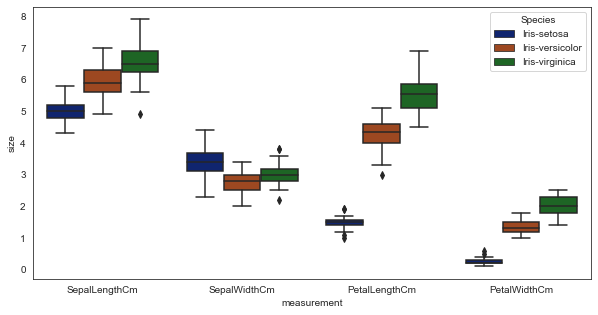

In [12]:
sns.set_style('white')
sns.set_palette('dark')
f=plt.figure(figsize=(10,5))
sns.boxplot(x=df_new['measurement'],y=df_new['size'],hue=df_new['Species'])

Pairplot shows the overall data distribution

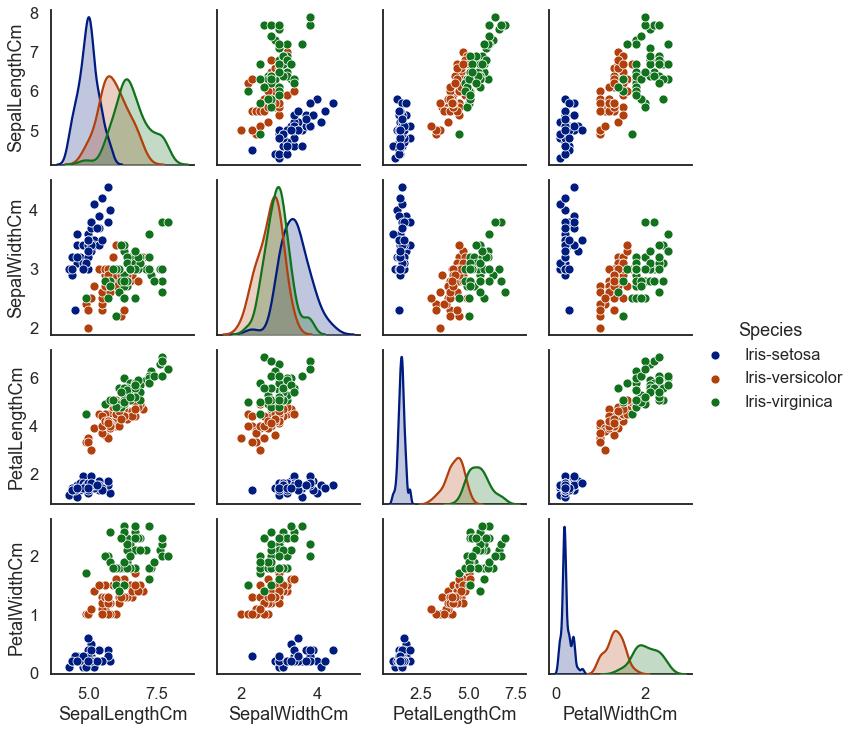

In [14]:
sns.set_context('talk')
plot=sns.pairplot(df,hue='Species')
plot

From pairplot we can infer that the separate group of iris-setosa is present whereas the clusters of iris-virginica and iris-versicolor are overlapping

Now seeing the probability distribution of each feature:

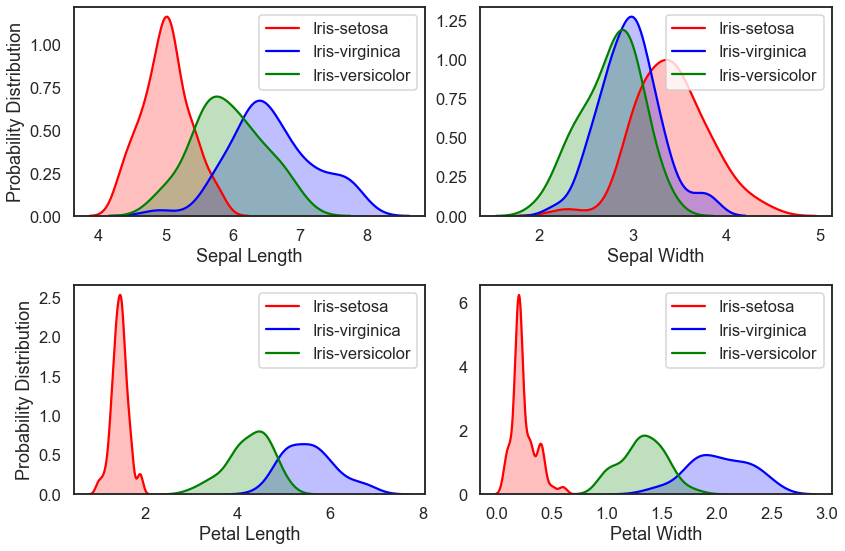

In [15]:
fig, ax =plt.subplots(2,2,figsize=(12,8))
ax[0,0].set_xlabel('Sepal Length')
ax[0,1].set_xlabel('Sepal Width')
ax[1,0].set_xlabel('Petal Length')
ax[1,1].set_xlabel('Petal Width')
sns.kdeplot(df.loc[(df['Species']=='Iris-setosa'), 
            'SepalLengthCm'], ax=ax[0,0], color='r', shade=True, Label='Iris-setosa') 
  
sns.kdeplot(df.loc[(df['Species']=='Iris-virginica'),  
            'SepalLengthCm'],ax=ax[0,0], color='b', shade=True, Label='Iris-virginica')

sns.kdeplot(df.loc[(df['Species']=='Iris-versicolor'),  
            'SepalLengthCm'],ax=ax[0,0], color='g', shade=True, Label='Iris-versicolor') 
sns.kdeplot(df.loc[(df['Species']=='Iris-setosa'), 
            'SepalWidthCm'], ax=ax[0,1], color='r', shade=True, Label='Iris-setosa') 
  
sns.kdeplot(df.loc[(df['Species']=='Iris-virginica'),  
            'SepalWidthCm'],ax=ax[0,1], color='b', shade=True, Label='Iris-virginica')

sns.kdeplot(df.loc[(df['Species']=='Iris-versicolor'),  
            'SepalWidthCm'],ax=ax[0,1], color='g', shade=True, Label='Iris-versicolor')
sns.kdeplot(df.loc[(df['Species']=='Iris-setosa'), 
            'PetalLengthCm'], ax=ax[1,0], color='r', shade=True, Label='Iris-setosa') 
  
sns.kdeplot(df.loc[(df['Species']=='Iris-virginica'),  
            'PetalLengthCm'],ax=ax[1,0], color='b', shade=True, Label='Iris-virginica')

sns.kdeplot(df.loc[(df['Species']=='Iris-versicolor'),  
            'PetalLengthCm'],ax=ax[1,0], color='g', shade=True, Label='Iris-versicolor')
sns.kdeplot(df.loc[(df['Species']=='Iris-setosa'), 
            'PetalWidthCm'], ax=ax[1,1], color='r', shade=True, Label='Iris-setosa') 
  
sns.kdeplot(df.loc[(df['Species']=='Iris-virginica'),  
            'PetalWidthCm'],ax=ax[1,1], color='b', shade=True, Label='Iris-virginica')

sns.kdeplot(df.loc[(df['Species']=='Iris-versicolor'),  
            'PetalWidthCm'],ax=ax[1,1], color='g', shade=True, Label='Iris-versicolor')

for ax in ax.flatten():
    if ax.is_first_col():
        ax.set_ylabel('Probability Distribution')
fig.tight_layout()

From the above graphs we cannot clearly infer that the features are normally distributedd or not, hece using the shapiro test for the same:

***Shapiro-Wilk Test for Normal Distribution***

***Null Hypothesis -*** The sample is not significantly deviated from normal distribution

***Alternate Hypothesis -*** The sample is significantly deviated from normal distribution

***If p<0.05, reject the null hypothesis and accept the alternate***

In [16]:
st,p=stats.shapiro(df['SepalLengthCm'])
if p<0.05:
    print('The variable SepalLengthCm is not normally distributed')
else:
    print('The variable SepalLengthCm is normally distributed')
    
st,p=stats.shapiro(df['SepalWidthCm'])
if p<0.05:
    print('The variable SepalWidthCm is not normally distributed')
else:
    print('The variable SepalWidthCm is normally distributed')
    
st,p=stats.shapiro(df['PetalLengthCm'])
if p<0.05:
    print('The variable PetalLengthCm is not normally distributed')
else:
    print('The variable PetalLengthCm is normally distributed')

st,p=stats.shapiro(df['PetalWidthCm'])
if p<0.05:
    print('The variable PetalWidthCm is not normally distributed')
else:
    print('The variable PetalWidthCm is normally distributed')

The variable SepalLengthCm is not normally distributed
The variable SepalWidthCm is normally distributed
The variable PetalLengthCm is not normally distributed
The variable PetalWidthCm is not normally distributed


***Thus from above analysis we can see that except Sepal width all the other features are not normally distributed i.e., they have the skewed data***

***Moreover from the box-plot we also have observed the presence of outliers***

***From the pair plot we also observed that for some of the features, the labels are linearly separable whereas for some it is not.***

Thus from the above points we can choose decision tree classification algorithm instead of logistic as it is one of the classification algorithm that can handle skewed data, data with outliers as well as linearly non separable data

# Defining Decision tree algorithm

In [17]:
inp=df.drop(['Species'],axis=1)
op=df['Species']

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(inp,op,test_size=0.3,random_state = 48)

In [19]:
dtree_mod=DecisionTreeClassifier()
dtree_mod.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [20]:
ypredict=dtree_mod.predict(xtest)

In [21]:
accuracy=accuracy_score(ytest,ypredict)
confusion_matrice=confusion_matrix(ytest,ypredict)

In [22]:
print('Accuracy:',accuracy)

Accuracy: 0.9333333333333333


In [23]:
confusion_matrice

array([[11,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 15]], dtype=int64)

In [24]:
ytest.value_counts()

Iris-versicolor    18
Iris-virginica     16
Iris-setosa        11
Name: Species, dtype: int64

Thus here we get our model with ***accuracy 93.33%***. From the confusion matrix and ytest value counts we can say that  our first row in confusion matrix is of Iris-setosa, the next row is of Iris-versicolor and the last row is of Iris-verginica. Confusion matrix gives the information about how many of the labels are correctly identified and how many are wrongly identified. ***Iris setosa is being hundred percent correctly identified by our model. Out of 18 Iris-versicolor, 16 are correctly identified and 2 are miss identified to Iris-verginica. Similarlly, out of 16 Iris-verginica, 1 is wrongly identified as Iris-versicolor where as others are truely identified.***

In [25]:
report=classification_report(ytest,ypredict)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.88      0.94      0.91        16

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45



From the classification report for Iris-setosa, we get precision of 100% (precision means out of the total prediction, how many are correctly predicted), recall 100%(recall means out of the actual prediction, how many are correctly identified) and f1 score which is a balance between precision and recall also as 100%.
For iris-versicolor, the precision is 94% (16/17 from confusion matrix) and recall is 89% (16/18 from confusion matrix) and the F1 score is of 91%, Similarlly for iris-verginica, the precision is 88% and recall is 94%

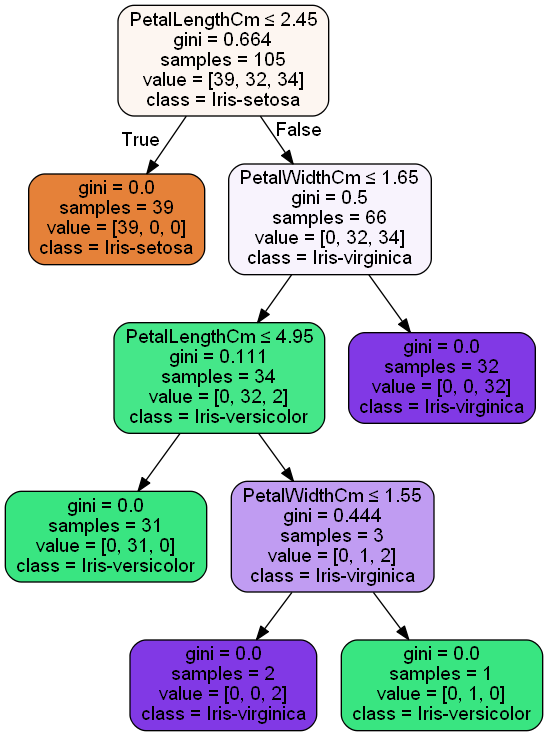

In [27]:
dot_data = StringIO()
export_graphviz(dtree_mod, out_file=dot_data, feature_names=inp.columns.tolist(),class_names=op.unique().tolist(),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The above graph is a viusal representation of the decision tree. If a new data point reaches to a particular leaf in the decision tree, will have a class of that leaf.

Decision tree tends to overfit the model a lot but in our example for testing the accuracy against test data we directly get 93% which means that there is very less possibility of overfitting in our model. Hence no need of hpyerparameter tuning